# Decision Trees

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = '../../data_20210213_1406_____USE_THIS_latest_version/train_20210213_1406_NAmean.csv'
df = pd.read_csv(path)
df.info()

x = df[["OverallQual", "GrLivArea", "TotalBsmtSF", "2ndFlrSF", "GarageCars"]]
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)

# select important features (as per data exploration research findings)
df_train = df_train[["OverallQual", "GrLivArea", "TotalBsmtSF", "2ndFlrSF", "GarageCars", "SalePrice"]]
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 196 entries, Unnamed: 0 to MiscFeature_nan
dtypes: float64(4), int64(192)
memory usage: 2.2 MB


,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,GarageCars,SalePrice
318,7,2646,1347,1274,3,260000
580,6,1429,1144,0,2,181900
961,6,2872,1330,1330,2,272000
78,4,1768,1768,0,0,136500
5,5,1362,796,566,2,143000


In [155]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# train
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)

regr_2 = DecisionTreeRegressor(max_depth=3)
regr_2.fit(X_train, y_train)

regr_3 = DecisionTreeRegressor(max_depth=10)
regr_3.fit(X_train, y_train)

# predict
y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)
y_pred_3 = regr_3.predict(X_test)

In [8]:
print('X:', X_train.shape)
print('y:', y_train.shape)

X: (1168, 5)
y: (1168,)


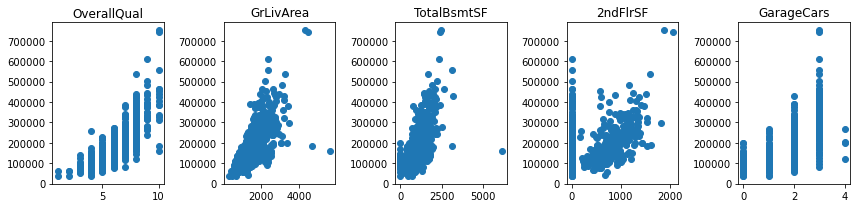

In [40]:
fig, ax = plt.subplots(1, 5, figsize=(12,3))

ax[0].scatter(X_train['OverallQual'].to_numpy(), y_train)
ax[0].set_title('OverallQual')

ax[1].scatter(X_train['GrLivArea'].to_numpy(), y_train)
ax[1].set_title('GrLivArea')

ax[2].scatter(X_train['TotalBsmtSF'].to_numpy(), y_train)
ax[2].set_title('TotalBsmtSF')

ax[3].scatter(X_train['2ndFlrSF'].to_numpy(), y_train)
ax[3].set_title('2ndFlrSF')

ax[4].scatter(X_train['GarageCars'].to_numpy(), y_train)
ax[4].set_title('GarageCars')

plt.tight_layout()

Text(0.5, 1.0, 'GarageCars')

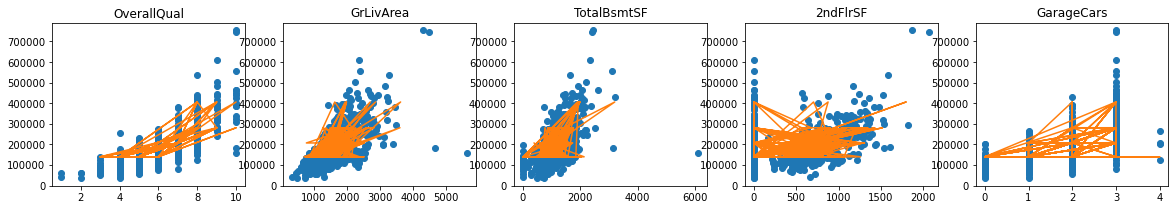

In [47]:
fig, ax = plt.subplots(1, 5, figsize=(20,3))

ax[0].scatter(X_train['OverallQual'].to_numpy(), y_train)
ax[0].plot(X_test['OverallQual'].to_numpy(), y_pred_1, label="Max Depth=2", color='tab:orange')
ax[0].set_title('OverallQual')

ax[1].scatter(X_train['GrLivArea'].to_numpy(), y_train)
ax[1].plot(X_test['GrLivArea'].to_numpy(), y_pred_1, label="Max Depth=2", color='tab:orange')
ax[1].set_title('GrLivArea')

ax[2].scatter(X_train['TotalBsmtSF'].to_numpy(), y_train)
ax[2].plot(X_test['TotalBsmtSF'].to_numpy(), y_pred_1, label="Max Depth=2", color='tab:orange')
ax[2].set_title('TotalBsmtSF')

ax[3].scatter(X_train['2ndFlrSF'].to_numpy(), y_train)
ax[3].plot(X_test['2ndFlrSF'].to_numpy(), y_pred_1, label="Max Depth=2", color='tab:orange')
ax[3].set_title('2ndFlrSF')

ax[4].scatter(X_train['GarageCars'].to_numpy(), y_train)
ax[4].plot(X_test['GarageCars'].to_numpy(), y_pred_1, label="Max Depth=2", color='tab:orange')
ax[4].set_title('GarageCars')

In [53]:
test_accuracy = regr_1.score(X_test, y_test)
print(f'Validation accuracy with max_depth=1: {test_accuracy*100}%')

test_accuracy = regr_2.score(X_test, y_test)
print(f'Validation accuracy with max_depth=5: {test_accuracy*100}%')

Validation accuracy with max_depth=1: 59.06822857584455%
Validation accuracy with max_depth=5: 80.74369631055102%


In [61]:
from sklearn.metrics import r2_score, mean_squared_error

r2_1 = r2_score(y_test, y_pred_1)
rmse_1 = mean_squared_error(y_test, y_pred_1, squared=False)
print(f"R^2 max_depth=2: {r2_1}")
print(f"RMSE max_depth=2: {rmse_1}")
print()

r2_2 = r2_score(y_test, y_pred_2)
rmse_2 = mean_squared_error(y_test, y_pred_2, squared=False)
print(f"R^2 max_depth=5: {r2_2}")
print(f"RMSE max_depth=5: {rmse_2}")
print()

r2_3 = r2_score(y_test, y_pred_3)
rmse_3 = mean_squared_error(y_test, y_pred_3, squared=False)
print(f"R^2 max_depth=10: {r2_3}")
print(f"RMSE max_depth=10: {rmse_3}")

R^2 max_depth=2: 0.5906822857584455
RMSE max_depth=2: 50293.39798229022

R^2 max_depth=5: 0.8088224286816379
RMSE max_depth=5: 34371.554875203605

R^2 max_depth=10: 0.7847888782417684
RMSE max_depth=10: 36468.09390389297


In [95]:
# grid search
from sklearn.model_selection import GridSearchCV

n_features = X_train.shape[1]
n_samples = X_train.shape[0]
grid = GridSearchCV(DecisionTreeRegressor(random_state=123), 
                       n_jobs=-1,
                       cv=10,
                       param_grid={
                           'criterion': ['mse', 'friedman_mse'],
                           'max_depth': [2,4,6,8,10,12],
                           'min_samples_split': [2, 0.3, 0.5, n_samples//2, n_samples//3, n_samples//5],
                           'min_samples_leaf': [1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]
                       })
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 0.3, 0.5, 584, 389, 233],
                         'min_samples_split': [2, 0.3, 0.5, 584, 389, 233]})

In [96]:
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Train R^2 Score : 0.892
Test R^2 Score : 0.809
Best R^2 Score Through Grid Search : 0.793
Best Parameters :  {'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [97]:
import pandas as pd

cross_val_results = pd.DataFrame(grid.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head()

Number of Various Combinations of Parameters Tried : 432


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010027,0.004058,0.006745,0.006025,mse,2,1,2,"{'criterion': 'mse', 'max_depth': 2, 'min_samp...",0.535434,...,0.553277,0.593704,0.591956,0.549371,0.650492,0.572571,0.629671,0.577811,0.047790,61
1,0.012132,0.004346,0.011623,0.006199,mse,2,1,0.3,"{'criterion': 'mse', 'max_depth': 2, 'min_samp...",0.530983,...,0.593721,0.541792,0.519135,0.539554,0.678096,0.553781,0.634166,0.569466,0.059101,63
2,0.013149,0.010478,0.015743,0.012289,mse,2,1,0.5,"{'criterion': 'mse', 'max_depth': 2, 'min_samp...",0.530983,...,0.593721,0.541792,0.519135,0.539554,0.678096,0.553781,0.634166,0.569466,0.059101,63
3,0.006755,0.001110,0.009144,0.003752,mse,2,1,584,"{'criterion': 'mse', 'max_depth': 2, 'min_samp...",0.530983,...,0.593721,0.541792,0.519135,0.539554,0.678096,0.553781,0.634166,0.569466,0.059101,63
4,0.007770,0.001832,0.009527,0.005156,mse,2,1,389,"{'criterion': 'mse', 'max_depth': 2, 'min_samp...",0.530983,...,0.593721,0.541792,0.519135,0.539554,0.678096,0.553781,0.634166,0.569466,0.059101,63


In [146]:
regr = DecisionTreeRegressor(criterion='mse',
                                max_depth=6, 
                                min_samples_leaf=1,
                                min_samples_split=2).fit(X_train, y_train)
preds = regr.predict(X_test)

In [147]:
preds = regr.predict(X_test)
r2 = r2_score(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"R^2 max_depth=10: {r2}")
print(f"RMSE max_depth=10: {rmse}")

R^2 max_depth=10: 0.8081107210156533
RMSE max_depth=10: 34435.47391712332


In [156]:
preds_2 = regr_1.predict(X_test)
r2_2 = r2_score(y_test, preds_2)
rmse_2 = mean_squared_error(y_test, preds_2, squared=False)
print(f"R^2 max_depth=10: {r2_2}")
print(f"RMSE max_depth=10: {rmse_2}")

R^2 max_depth=10: 0.5906822857584455
RMSE max_depth=10: 50293.39798229022


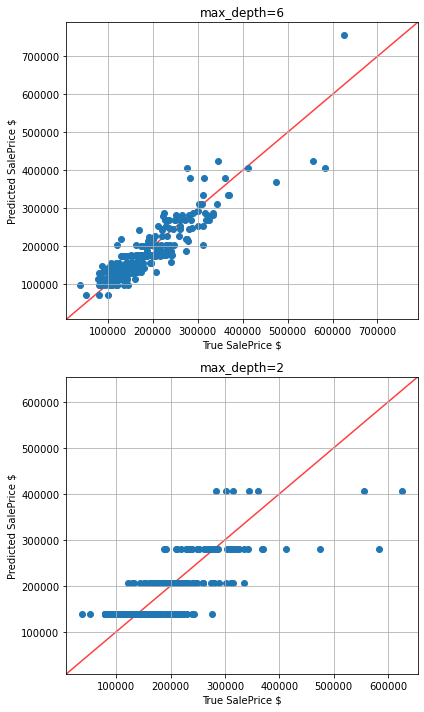

In [158]:
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(6,10))
ax[0].scatter(y_test, preds)
lims = [
    np.min([ax[0].get_xlim(), ax[0].get_ylim()]),  # min of both axes
    np.max([ax[0].get_xlim(), ax[0].get_ylim()]),  # max of both axes
]
ax[0].set_xlabel('True SalePrice \$')
ax[0].set_ylabel('Predicted SalePrice \$')
ax[0].set_title('max_depth=6')
# now plot both limits against eachother
ax[0].plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax[0].set_xlim(lims)
ax[0].set_ylim(lims)
ax[0].grid(True)

ax[1].scatter(y_test,preds_2)
lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes
]
ax[1].plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax[1].set_xlabel('True SalePrice \$')
ax[1].set_ylabel('Predicted SalePrice \$')
ax[1].set_title('max_depth=2')
ax[1].set_xlim(lims)
ax[1].set_ylim(lims)
ax[1].grid(True)
plt.tight_layout()
plt.savefig('trees_perform.png')